In [7]:
import numpy as np
import random as rand
import matplotlib.pyplot as plt

# Pseudo Code
# Create vector of normally distributed x values centered around 0
# Get fitness by evaluating function f(x) = 10*x**2 at given x
# Cross over parents by taking weighted average
# Mutate by generating a random value called mutation factor, for ex: 0.9
# Decide with probability p whether to mutate i'th individual by multiplying by i'th mutation factor
# Select most fit solutions to reproduce

def objective_function(x_1, x_2):
    f = (np.sqrt(3) / 2 * (x_1 - 3) + 1 / 2 * (x_2 - 5))**2 + 5 * (np.sqrt(3) / 2 * (x_2 - 5) - 1 / 2 * (x_1 - 3))**2
    return f


def create_pop(pop_size, pop_spread):
    # Generates initial population of x values
    pop_set = np.zeros((pop_size, 2), dtype=float)
    # makes an empty column vector that has number of rows = pop_size
    for individual in range(pop_size):
        # indexes each row/individual in pop_set
        for x_val in range(len(pop_set[0, :])):
            pop_set[individual, x_val] = rand.uniform(-1 * pop_spread, pop_spread)
        # chooses each individual's x value from between -spread and +spread

    return pop_set


def fitness_calc(pop_set):
    fitness = np.ndarray(shape=(len(pop_set[:, 0]),), dtype=float)

    for individual in range(len(pop_set[:, 0])):
        fitness[individual] = -1 * objective_function(pop_set[individual, 0], pop_set[individual, 1])

    return fitness


def mating(pop_set, fitness, mates_quant):
    mate_order = np.argsort(fitness)[::-1]
    # pop_size x 1 column vector of individual indices (row # in pop_set) in order of descending fitness
    # [::-1] means descending order
    parents = pop_set[mate_order]
    # creates descending fitness-ordered array of parents from whole rows of pop_set
    parents = parents[:mates_quant, :]
    # trims the number of rows up to but excluding the "mates_quant"'th indexed row
    parent_fitness = fitness[mate_order]
    # grabs the fitness of parents in descending order
    parent_fitness = parent_fitness[:mates_quant]
    # up to the number of parents selected
    # parents and their fitness are related index-wise

    return parents, parent_fitness


def crossover(parents, children_quant):
    children = np.zeros((children_quant, 2), dtype=float)
    # creates column vector with # rows = children_quant

    for child in range(children_quant):
        # indexes children up to given # of children
        # generates random value between 0 and 1 to use as a weight for weighted average crossover
        p1_idx = child % children_quant
        # creates index/chooses row of parent for parent 1 of current loop child
        p2_idx = (child + 1) % children_quant
        # does the same for parent 2, restarts at parents[row index 0] when last child made
        children[child, 0] = parents[p1_idx, 0]
        children[child, 1] = parents[p2_idx, 1]
        # performs crossover as weighted average of parent 1 and parent 2
        # crossover behavior: (parent 1 * crossing_ratio' + parent 2 * crossing_ratio)/2
    children_fitness = fitness_calc(children)
    # returns a column vector with child_quant # of rows filled with objective values of children
    return children, children_fitness
    # children and their fitness are related index-wise


def mutation(children, prob_mutation, mutation_spread):
    for child in range(len(children[:, 0])):
        # indexes rows in children
        mutated_children = children
        # renames copy of children to mutated_children containing the same values as children
        mutations = np.random.uniform(0.0, 1.0, (len(children[:, 0]), 2))
        # creates a matrix of random values between 0 and 1
        mutation_spread = np.random.uniform(-1 * mutation_spread, mutation_spread)
        # create random percentage value between +-maximum percentage to increase/decrease mutated child by
        for x_val in range(len(children[0, :])):
            if mutations[child, x_val] <= prob_mutation:
                # if mutation value[child row index] is less than specified prob
                mutated_children[child, x_val] *= 1 + mutation_spread
                # increase/decrease child by the random percentage from above
    mutated_child_fitness = fitness_calc(children)
    # sets the fitness value of mutated offspring = the fitness of the given offspring pop

    return mutated_children, mutated_child_fitness


def environmental_selection(parents, mutated_children, pop_size, parent_fitness, mutated_children_fitness):
    pop_set = np.vstack((parents, mutated_children))
    # creates a population by stacking parents and mutated offspring row-wise (row on top of row)
    # ex: vstack(([1,2,3],[4,5,6])) = [[1,2,3],[4,5,6]]
    fitness = np.concatenate((parent_fitness, mutated_children_fitness))
    # creates long fitness column vector composed of parent then mutated offspring fitness
    # np.concatenate() uses existing axis if none specified, in this case, row
    # therefore fitness is also stacked row-wise
    fitness_order = np.argsort(fitness)[::-1]
    # (rows in parents + mutated children) x 1 column vector
    # filled with the individual indices (row # in pop_set) in order of descending fitness
    pop_set = pop_set[fitness_order]
    # reorders pop_set in descending fitness
    pop_set = pop_set[:pop_size, :]
    # trims the pop_set # of rows/population size to the specified pop_size
    pop_fitness = fitness[fitness_order][:pop_size]
    # grabs the objective value of individuals are carrying in descending order up to the size of pop
    # individuals and their fitness are related index-wise

    return pop_set, pop_fitness


def ellipsoid_ga(pop_size, pop_spread, mates_quant, num_generations, children_quant, mutation_spread, prob_mutation):
    pop_set = create_pop(pop_size, pop_spread)
    best_fitnesses = np.zeros(num_generations)

    for generation in range(num_generations):
        fitness = fitness_calc(pop_set)
        parents, parent_fitness = mating(pop_set, fitness, mates_quant)
        children, children_fitness = crossover(parents, children_quant)
        mutated_children, mutated_children_fitness = mutation(children, prob_mutation, mutation_spread)
        pop_set, pop_fitness = environmental_selection(parents, mutated_children, pop_size, parent_fitness,
                                                       mutated_children_fitness)

        max_idx = np.argmax(pop_fitness)
        best_solution = pop_set[max_idx, :]
        best_fitness = pop_fitness[max_idx]
        best_fitnesses[generation] = best_fitness

        print('Parents Info')
        print(parents)
        print(parent_fitness)

        print('Offsprings Info')
        print(children)
        print(children_fitness)

        print('Mutated Offsprings Info')
        print(mutated_children)
        print(mutated_children_fitness)

        print('Current Generation:', generation)
        print('Best Solution So Far:', best_solution)
        print('Best Fitness So Far', best_fitness)

    print('Final Generation:')
    print('Best Solution Overall:', best_solution)
    print('Best Fitness Overaall', best_fitness)

    plt.figure(figsize=(12, 12))
    plt.plot(best_fitnesses, '-o', lw=3, ms=20)
    plt.xlabel("Generation")
    plt.ylabel("Best Fitness")
    plt.show()

    # print('Best Fitnesses from All Generations')
    # print(best_fitnesses)

    return pop_set, pop_fitness, best_solution, best_fitness, best_fitnesses


Parents Info
[[ -3.13356662  -7.30353208]
 [-21.57167982 -29.50335171]
 [ 18.63099294  41.25942171]
 [-53.99177315 -19.22842315]
 [-48.24907097  -1.53315945]
 [  5.32886332 -29.79174537]
 [ 55.33331118   6.39718875]
 [ 67.6539124   24.41904469]
 [ 23.21824986 -23.81143382]
 [-60.59346994 -39.43550149]
 [ -3.0239326  -37.16780922]
 [-50.49491002   8.69360784]
 [-65.14977844  -9.02573729]
 [ 29.42146953  55.3035466 ]
 [-76.82538317 -26.61296789]
 [ 51.69360213  67.42688435]
 [-22.78610165 -54.73526296]
 [ 28.3336359   64.76617867]
 [-89.67978653 -42.6595027 ]
 [-44.53725928 -62.05847261]
 [-93.20492585 -43.8913312 ]
 [-57.54220573 -64.31705853]
 [ 55.25889681 -19.09589561]
 [ 81.10905064  74.21042099]
 [-84.20978967  -3.77629537]]
[  -419.33207292  -3032.57626929  -3784.28701099  -4060.88681775
  -4263.81844532  -5133.38898762  -5232.0660374   -5519.41475408
  -6155.8474068   -6197.42889287  -6305.1346893   -6462.45088428
  -6764.50522096  -6913.85993719  -7999.98228473  -9800.4563413
 -

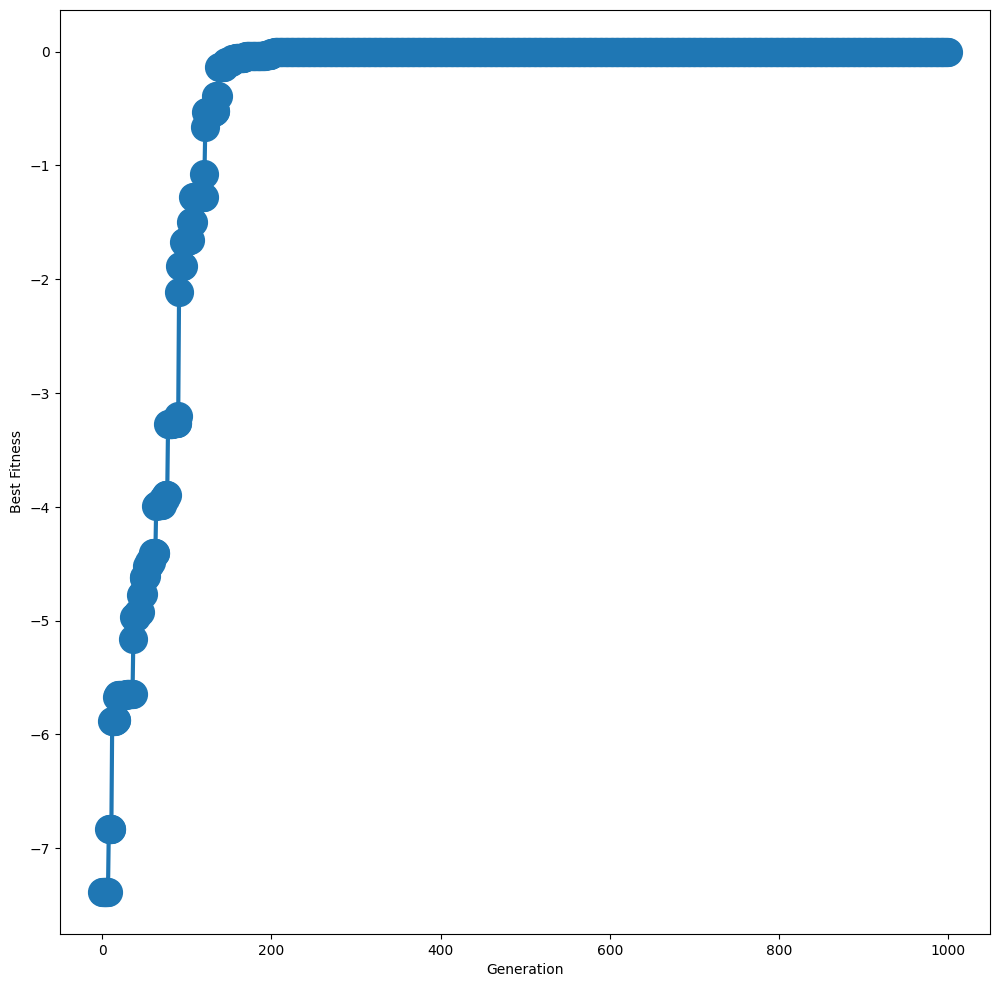

In [12]:

# Constants for GA
pop_size = 50

pop_spread = 100

mates_quant = 25

children_quant = mates_quant - 1

num_generations = 1000

prob_mutation = 0.1

mutation_spread = 0.1

pop_set,pop_fitness,best_solution,best_fitness,best_fitnesses = ellipsoid_ga(pop_size, pop_spread, mates_quant, num_generations, children_quant, mutation_spread, prob_mutation)